<a href="https://colab.research.google.com/github/raj3si/Global-terrorism-database-capstone-project/blob/main/Global_Terrorism_EDA_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJECT - GLOBAL TERRORISM DATABASE - EXPLORATORY DATA ANALYSIS**

**The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. It includes systematic data on domestic as well as international  terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.**

**Explore and analyze the data to discover key findings pertaining to terrorist activities.**

###**Objectives**

*   The objective of the project would be to drive meaningful insights from  the given dataset.Following are the points:


1. Cleaning the data

1.   Analysing the attacks over the years
2.   Analysing the most affected cities,countries and regions

2.   Analysing the most active organisation

1.   Analysing the terrorist killed in the attacks
2.   Analysing the database resources





### Import libraries

* Importing the neccessary libraries

In [ ]:
#importing python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing warnging library for ignoring warning while filtering data
import warnings as war
war.filterwarnings("ignore")

###Load dataset

* Loading the Global Terrorism Dataset

In [ ]:
#load the data set
df=pd.read_csv("/content/drive/MyDrive/Global Terrorism Data.csv",encoding="latin1")

In [ ]:
#copy the data set
gt_df=df.copy()

###Dataset  view

* Showing first and last five rows

In [ ]:
#show the first five rows
gt_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [ ]:
gt_df.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


###Dataset Rows & Columns count

In [ ]:
#To count the number of rows and columns
gt_df.shape

(181691, 135)

### Dataset Information

In [ ]:
#To get information of dataset
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


###Dataset describing

In [ ]:
gt_df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


##Datacleaning

* The dataset contains 135 columns and 181691 rows related to the terrorist attacks from 1970 to 2017.In this step we will do following methods on the data:-


1.   Deal with the duplicates value of any

1.   Then comprehend the NaN values

1.   Remove unwanted columns and rows
2.   Rename the columns name



###Duplicates value

In [ ]:
#To count the duplicates values
gt_df.duplicated().sum()

0

###Null values:-Removing null values

In [ ]:
#To count null values in each column
null_value=gt_df.isnull().sum()
print(null_value.to_string())

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

In [ ]:
#To drop the columns in which most of the values are null
gt_df=gt_df.dropna(thresh=100000,axis=1)

In [ ]:
#To drop the rows in which most of the values are null
gt_df=gt_df.dropna(thresh=50,axis=0)

In [ ]:
gt_df.shape

(120915, 58)

In [ ]:
nul=gt_df.isnull().sum()
print(nul.to_string())

eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country                 0
country_txt             0
region                  0
region_txt              0
provstate              31
city                  432
latitude              952
longitude             952
specificity             6
vicinity                0
summary              5443
crit1                   0
crit2                   0
crit3                   0
doubtterr               1
multiple                1
success                 0
suicide                 0
attacktype1             0
attacktype1_txt         0
targtype1               0
targtype1_txt           0
targsubtype1         7051
targsubtype1_txt     7051
corp1               11573
target1               194
natlty1              1120
natlty1_txt          1120
gname                   0
guncertain1           380
individual              0
nperps              14846
nperpcap             8749
claimed     

In [ ]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120915 entries, 5 to 181690
Data columns (total 58 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           120915 non-null  int64  
 1   iyear             120915 non-null  int64  
 2   imonth            120915 non-null  int64  
 3   iday              120915 non-null  int64  
 4   extended          120915 non-null  int64  
 5   country           120915 non-null  int64  
 6   country_txt       120915 non-null  object 
 7   region            120915 non-null  int64  
 8   region_txt        120915 non-null  object 
 9   provstate         120884 non-null  object 
 10  city              120483 non-null  object 
 11  latitude          119963 non-null  float64
 12  longitude         119963 non-null  float64
 13  specificity       120909 non-null  float64
 14  vicinity          120915 non-null  int64  
 15  summary           115472 non-null  object 
 16  crit1             12

In [ ]:
#filling remaning nanvalues
gt_df["country_txt"].fillna("Unknown",inplace=True)
gt_df["region_txt"].fillna("Unknown",inplace=True)
gt_df["provstate"].fillna("Unknown",inplace=True)
gt_df["city"].fillna("Unknown",inplace=True)
gt_df["weaptype1_txt"].fillna("Unknown",inplace=True)
gt_df["suicide"].fillna(0,inplace=True)
gt_df["attacktype1_txt"].fillna("Unknown",inplace=True)
gt_df["gname"].fillna("Unknown",inplace=True)
gt_df["targtype1_txt"].fillna("Unknown",inplace=True)
gt_df["nkill"].fillna(0,inplace=True)
gt_df["property"].fillna(0,inplace=True)
gt_df["nkillter"].fillna(0,inplace=True)
gt_df["claimed"].fillna(0,inplace=True)
gt_df["nkillter"].fillna(0,inplace=True)
gt_df["nwound"].fillna(0,inplace=True)
gt_df["nwoundte"].fillna(0,inplace=True)


###Columns operation

In [ ]:
#to get all the columns name
gt_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'summary', 'crit1', 'crit2',
       'crit3', 'doubtterr', 'multiple', 'success', 'suicide', 'attacktype1',
       'attacktype1_txt', 'targtype1', 'targtype1_txt', 'targsubtype1',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt',
       'gname', 'guncertain1', 'individual', 'nperps', 'nperpcap', 'claimed',
       'weaptype1', 'weaptype1_txt', 'weapsubtype1', 'weapsubtype1_txt',
       'weapdetail', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus',
       'nwoundte', 'property', 'ishostkid', 'scite1', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')

In [ ]:
#remove columns
gt_df.drop(["nperps","crit2","crit3","nwoundus","nkillus","weapsubtype1","weaptype1","nperpcap","natlty1_txt","guncertain1","corp1","target1","natlty1","multiple","doubtterr","crit1","summary","scite1","extended","vicinity","extended","individual","weapdetail","country","region","specificity","attacktype1","targtype1","targsubtype1_txt","targsubtype1","natlty1","INT_LOG","INT_IDEO","INT_MISC","INT_ANY",],axis=1,inplace=True)

In [ ]:
#columns after removing unwanted columns
gt_df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'success', 'suicide',
       'attacktype1_txt', 'targtype1_txt', 'gname', 'claimed', 'weaptype1_txt',
       'weapsubtype1_txt', 'nkill', 'nkillter', 'nwound', 'nwoundte',
       'property', 'ishostkid', 'dbsource'],
      dtype='object')

In [ ]:
#rename columns name
gt_df.rename(columns={"iyear":"year","imonth":"month","iday":"day","country_txt":"country","region_txt":"region","provstate":"state","attacktype1_txt":"attack_type","targtype1_txt":"target","gname":"gang_name","claimed":"accepted_attack","weaptype1_txt":"weapon_type","weapsubtype1_txt":"weapon","nkill":"total_killed","nkillter":"terrorist_killed","nwound":"total_wounded","nwoundte":"terrorist_wounded","property":"property_damage"},inplace=True)

In [ ]:
gt_df.columns

Index(['eventid', 'year', 'month', 'day', 'country', 'region', 'state', 'city',
       'latitude', 'longitude', 'success', 'suicide', 'attack_type', 'target',
       'gang_name', 'accepted_attack', 'weapon_type', 'weapon', 'total_killed',
       'terrorist_killed', 'total_wounded', 'terrorist_wounded',
       'property_damage', 'ishostkid', 'dbsource'],
      dtype='object')

In [ ]:
gt_df.shape

(120915, 25)

##Analysing and Visualization

* After data cleaning we have only 25 columns and 120915 rows of the dataset.Now we analyse the data

###Line chart of attacks with the passage of time

* Here we analyse the terror attacks with the passage of time from 1970 to 2017

In [ ]:
#total attackes in each year
gt_year_attack=gt_df.groupby("year").agg({"year":"count"})
gt_year_attack.rename({"year":"total_attacks"},axis=1,inplace=True)
gt_year_attack=gt_year_attack.sort_values(by="year").reset_index()
gt_year_attack.sort_values(by="total_attacks").head(1).reset_index()

,index,year,total_attacks
0,3,1973,57


In [ ]:
gt_year_attack.sort_values(by="total_attacks").tail(1).reset_index()

,index,year,total_attacks
0,43,2014,16899


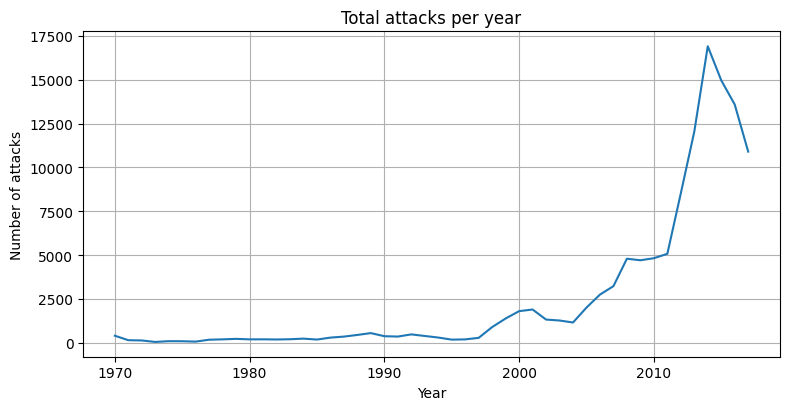

In [ ]:
plt.figure(figsize=(8,4))
sns.lineplot(x=gt_year_attack["year"],y=gt_year_attack["total_attacks"])
plt.grid(True)
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("Number of attacks")
plt.title("Total attacks per year")
plt.show()

We get following keys from the line chart:-


1.   Terror attacks rapidly increased after 2010.

1.   In 1973 the number of attacks were lowest,which was 57 in total.
2.   16899 attacks was the highest number of attacks in 2014 among all the years.
1.   In two decades(1970-1990), the number of terror attacks was almost constant.





### Region attacks with time

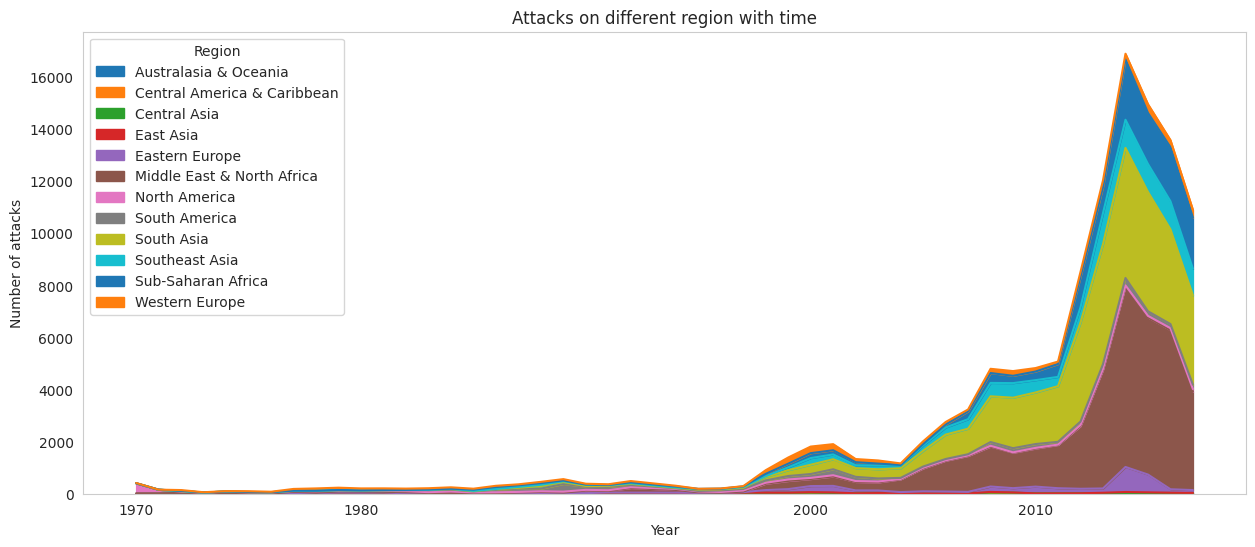

In [ ]:
pd.crosstab(gt_df.year,gt_df.region).plot(kind='area',figsize=(15,6))
plt.grid(False)
plt.title("Attacks on different region with time")
plt.ylabel("Number of attacks")
plt.xlabel("Year")
plt.legend(title="Region")
plt.show()

###Count plot of successful Vs unsuccessful over year

* Count plot shows the successful and unsuccessful attack in each year over the given period

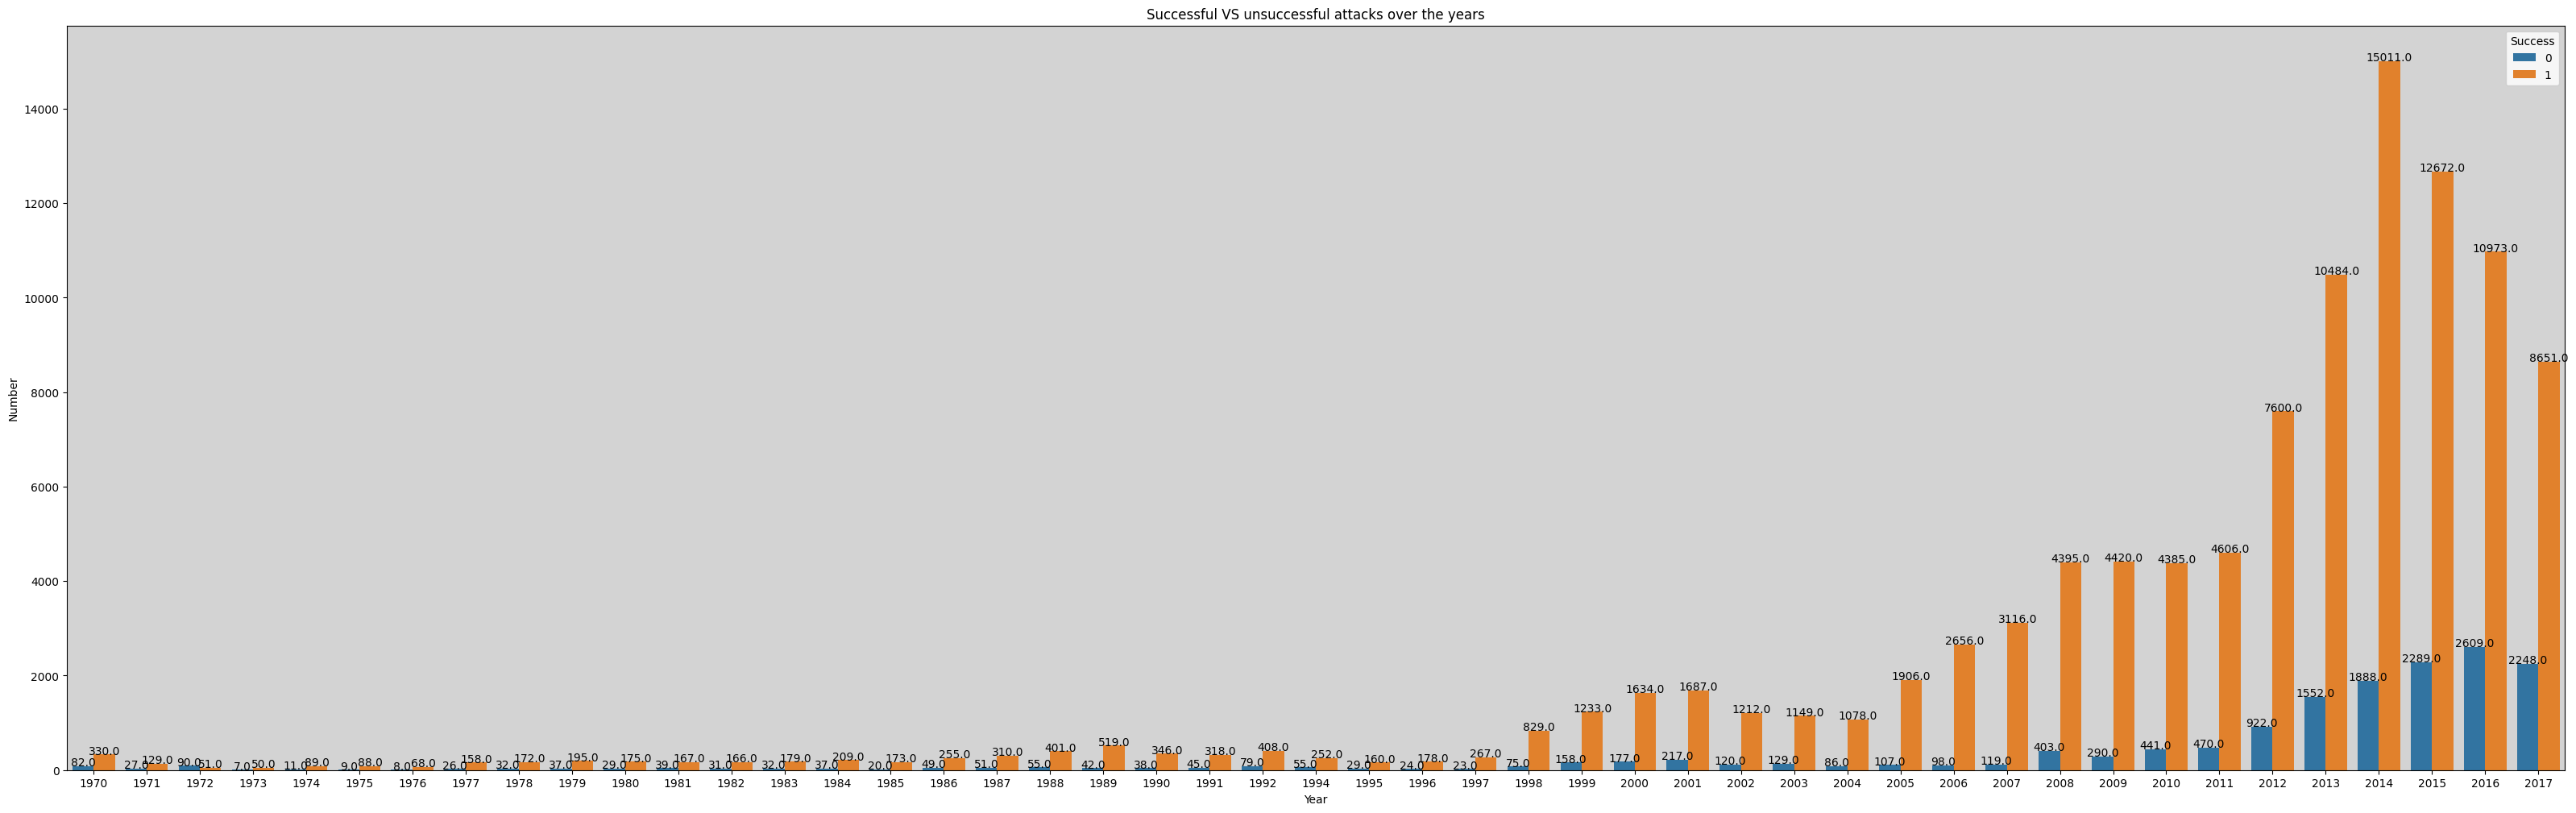

In [ ]:
plt.figure(figsize=(40,12))
ax=sns.countplot(x='year',hue='success',data=gt_df)
ax.set_facecolor('lightgray')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height() + 5),
                ha='center', va='baseline')
ax.set_title("Successful VS unsuccessful attacks over the years")
ax.set_xlabel("Year")
ax.set_ylabel("Number")
plt.legend(title="Success")
plt.show()

From the chart:-


1.   The number of successful and unsuccessful attacks before 1997 are negligible in front of the number attacks after 1998.
2.   Highest number of successful and unsuccessful attacks were in 2014 and 2016 ,respectively.


### Attacks in 2010

* In this chart we look at the people killed in 2010

In [ ]:
top_country=gt_df[gt_df.loc[:,"year"]==2010]
top_country=top_country.groupby(["year","country"]).agg({"total_killed":"sum"}).sort_values(by="total_killed",ascending=False).head(10).reset_index()

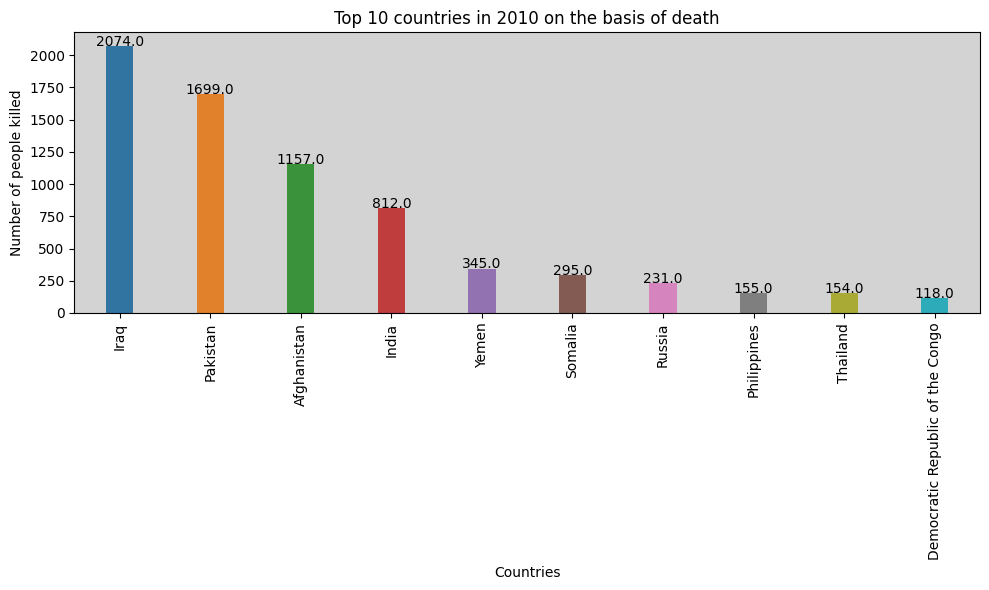

In [ ]:
plt.figure(figsize=(10,6))
band_width=0.30
ax=sns.barplot(x=top_country["country"],y=top_country["total_killed"],dodge=False, width=band_width)
for i,value in enumerate(top_country["total_killed"]):
  plt.text(i,value+band_width/2,str(value),ha="center")
ax.set_facecolor("lightgray")
plt.title("Top 10 countries in 2010 on the basis of death")
plt.xlabel("Countries")
plt.ylabel("Number of people killed")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(False)
plt.show()

From chart:-


1.   In 2010 , Iraq is the country were highest(2074) number of people killed.
2.  The number of killed people in Iraq , Pakistan , Afghanistan was more than 1000 but in India it was around 800, while , other countries had below 400.



In [ ]:
top_city=gt_df[gt_df.loc[:,"year"]==2010]
top_city=top_city.groupby(["year","city"]).agg({"total_killed":"sum"}).sort_values(by="total_killed",ascending=False).head(10).reset_index()

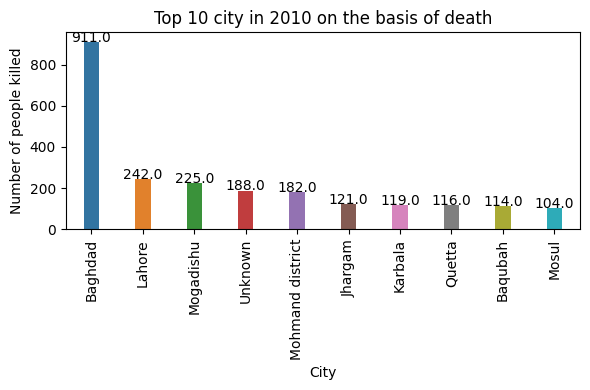

In [ ]:
plt.figure(figsize=(6,4))
band_width=0.30
sns.barplot(x=top_city["city"],y=top_city["total_killed"],dodge=False, width=band_width)
for i,value in enumerate(top_city["total_killed"]):
  plt.text(i,value+band_width/2,str(value),ha="center")
plt.title("Top 10 city in 2010 on the basis of death")
plt.xlabel("City")
plt.xticks(rotation=90)
plt.ylabel("Number of people killed")
plt.tight_layout()
plt.grid(False)
plt.show()

From chart:-


1.   Baghdad city had the highest number which was 8 times the 2nd highest city,Therefore in 2010 Baghdad was most dangerous city for living.


###Bar chart of total people affected(killed+wounded) with total attacks and also average of people affected in each attack

* Here we will look at the killed and wounded people in the different countries

In [ ]:
#to get number of people get affected in each country and the percentage of those people in everycountry
gt_df["total_people_affected"]=gt_df["total_killed"]+gt_df["total_wounded"]
country_df=gt_df.groupby("country").agg({"total_people_affected":"sum"}).sort_values(by="total_people_affected").reset_index()
country_df=country_df.loc[country_df.loc[:,"total_people_affected"]>0]
country_df=country_df.sort_values(by="total_people_affected",ascending=False).reset_index(drop=True)

In [ ]:
#most attacked country
attacked_country_df=gt_df.groupby("country").agg({"city":"count"}).rename(columns=({"city":"total_attack"}))
attacked_country_df1=attacked_country_df.sort_values(by="total_attack",ascending=False).reset_index()

In [ ]:
#merging two dataframes
new_df=pd.merge(country_df,attacked_country_df,on="country")
new_df2=new_df[new_df["total_attack"]>10].sort_values(["total_people_affected","total_attack"],ascending=False).head(10).reset_index(drop=True)

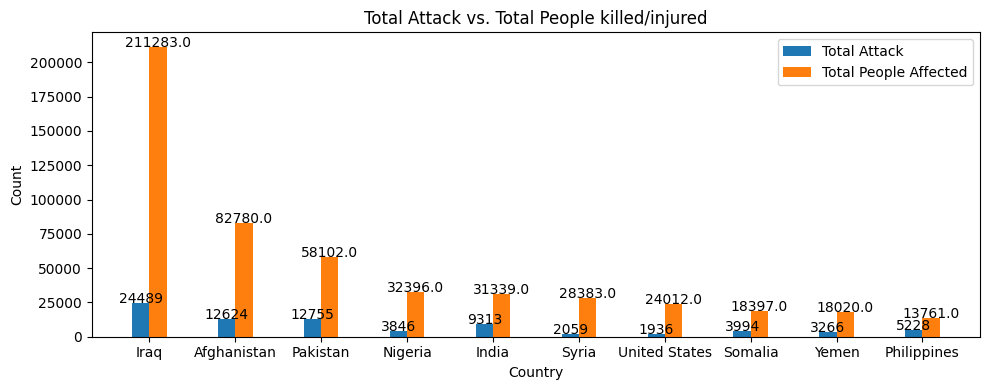

In [ ]:
#visualization
plt.figure(figsize=(10, 4))
bar_width = 0.20
index = range(len(new_df2))
plt.bar(index, new_df2['total_attack'], bar_width, label='Total Attack')
plt.bar([i + bar_width for i in index], new_df2['total_people_affected'], bar_width, label='Total People Affected')
for i, value in enumerate(new_df2['total_attack']):
    plt.text(i, value + bar_width/2, str(value), ha="center")
for i, value in enumerate(new_df2['total_people_affected']):
    plt.text(i + bar_width, value + bar_width/2, str(value), ha="center")
plt.xlabel('Country')
plt.xticks([i + bar_width/2 for i in index], new_df2['country'])
plt.ylabel('Count')
plt.title('Total Attack vs. Total People killed/injured')
plt.grid(False)
plt.legend()
plt.tight_layout()
plt.show()


Key points:-


1.   The number of people affected in Iraq (24489) is almost double of
Afghanistan's (12624) but attacks were nearly three times, 211283 and 82780 , respectively.
2. In Nigeria and India the number of attacks was around 31500 but the people affected in India was 9313 which is around 2.125 times of Nigeria

1.   From plot , we can say that Iraq was the most dangerous place or highest terror active area




Here we create a table for each country (who survive 11 attacks minimum) in which number of people got affected in each attack.

In [ ]:
#average affected people in each country which faced minmum 11 attacks
affect_attack_df=new_df.reset_index(drop=True)
affect_attack_df["ave_affected"]=round(affect_attack_df["total_people_affected"]/affect_attack_df["total_attack"],2)
affect_attack_df=affect_attack_df[affect_attack_df.loc[:,"total_attack"]>10]
affect_attack_df=affect_attack_df.sort_values(by="ave_affected",ascending=False).reset_index(drop=True)
affect_attack_df

,country,total_people_affected,total_attack,ave_affected
0,Chad,2559.0,76,33.67
1,Angola,3560.0,146,24.38
2,South Sudan,3957.0,225,17.59
3,Morocco,237.0,14,16.93
4,Kuwait,299.0,19,15.74
...,...,...,...,...
119,Panama,6.0,19,0.32
120,Uruguay,4.0,13,0.31
121,Zambia,4.0,18,0.22
122,Ireland,29.0,182,0.16


From the table:-


1.   The number of attacks in Chad was 76 so in term of attack its a safe place but the average people affected in each at is around 34 which is highest , therefore it was most unsafe place in the world after attack
2.   New Zealand and Ireland were most safest place in the world because there were 13 and 182 attacks , respectivily , and only 1 person and 29 people got affected in NZ and Ire , respectively. There average were .08 and .16 .



###Pie-chart of people killed in perticular region

* In the pie chart we look at the percentage of deaths in a perticular region

In [ ]:
#the percentage and number of death with a perticular weapon type
death_by_weapon=gt_df.groupby("region").agg({"total_killed":"sum"})
total_death=death_by_weapon["total_killed"].sum()
death_by_weapon["percentage"]=round(death_by_weapon["total_killed"]*100/total_death,2)
death_by_weapon.sort_values(by="total_killed",ascending=False).reset_index()

,region,total_killed,percentage
0,Middle East & North Africa,120882.0,41.26
1,South Asia,79523.0,27.14
2,Sub-Saharan Africa,60319.0,20.59
3,Southeast Asia,9608.0,3.28
4,South America,7237.0,2.47
5,Eastern Europe,6485.0,2.21
6,North America,3973.0,1.36
7,Western Europe,2391.0,0.82
8,Central America & Caribbean,1154.0,0.39
9,East Asia,968.0,0.33


In [ ]:
#to merge the region which has less than 5 percentage
min_per=death_by_weapon[death_by_weapon["percentage"]<5]
min_per=min_per.reset_index()
total_min_per=min_per["percentage"].sum()
total_min_kill=min_per["total_killed"].sum()
min_per["region"]="other"
other_df=pd.DataFrame({"region":["Other"],"total_killed":[total_min_kill],"percentage":[total_min_per]})
death_by_weapon=death_by_weapon[~(death_by_weapon["percentage"]<5)]
death_by_weapon=death_by_weapon.reset_index()
new_death_by_weapon=pd.concat([death_by_weapon,other_df]).reset_index(drop=True)

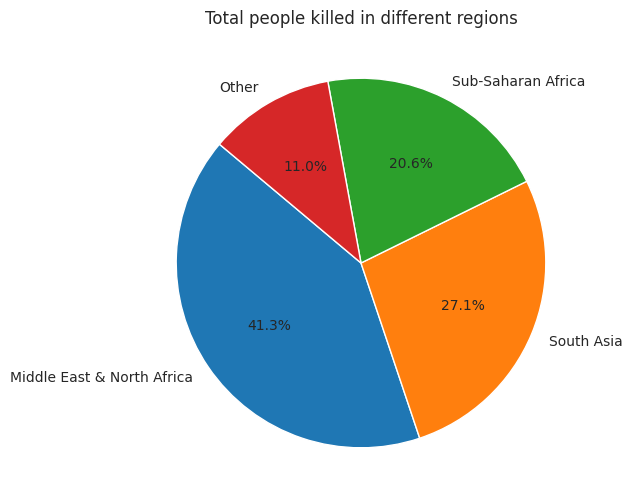

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(new_death_by_weapon["total_killed"],labels=new_death_by_weapon["region"],autopct="%1.1f%%",startangle=140)
plt.title("Total people killed in different regions")
plt.show()

From the pie-chart and table:-


1.   In the Middle East & North Africa around 41.3% of total deaths happend, which is the almost double percentage of Sub-Saharan Africa(20.6%).

1.   Western Europe , Central America & Caribbean	, East Asia , Central Asia	and Australasia & Oceania , had the percentage below 1% in each region.
2.  Australasia & Oceania  had the lowest percentage which is .01%.




###property damage





*   We will look at top 10 regions where most of property damage happened.





In [ ]:
property_df=gt_df.groupby("region").agg({"property_damage":"sum"}).sort_values(by="property_damage").head(10).reset_index()

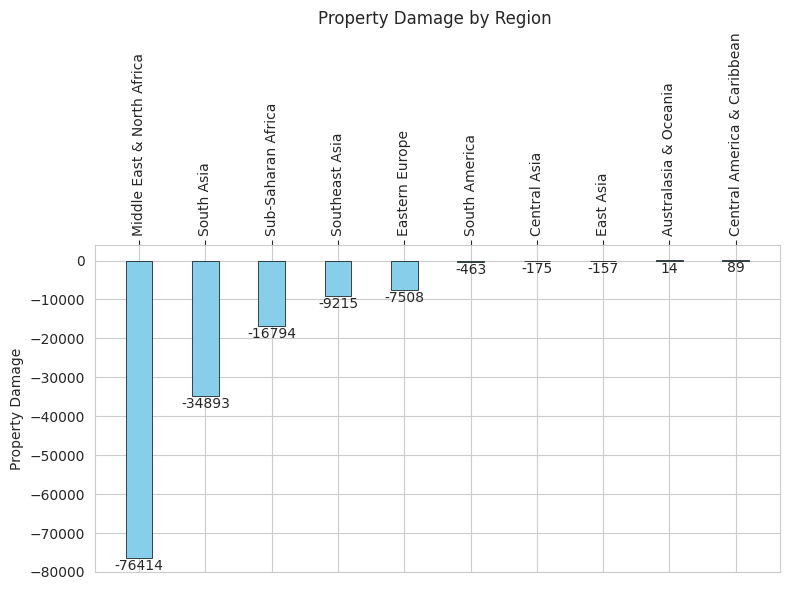

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(property_df['region'], property_df['property_damage'],width=0.40, color='skyblue',edgecolor="black",linewidth=0.5)
for i,value in enumerate(property_df["property_damage"]):
  plt.text(i,value-3000,str(value),ha="center")
# plt.xlabel('Region')
plt.ylabel('Property Damage')
plt.title('Property Damage by Region ')
plt.tick_params(axis='x', which='both',rotation=90, bottom=False, top=True, labelbottom=False, labeltop=True)
plt.tight_layout()
plt.show()



*   From the chart:-


1.   Middle East & North Africa	had most damage than other regions.
2.   Top three regions were those region which were attacked more than other region.





###state hostkid

* Here we look at the number of host who were kids in the attacks in different states

In [ ]:
host_state=gt_df.groupby("state").agg({"ishostkid":"sum"}).rename(columns=({"ishostkid":"kid_host"})).sort_values(by="kid_host",ascending=False).head(10).reset_index()

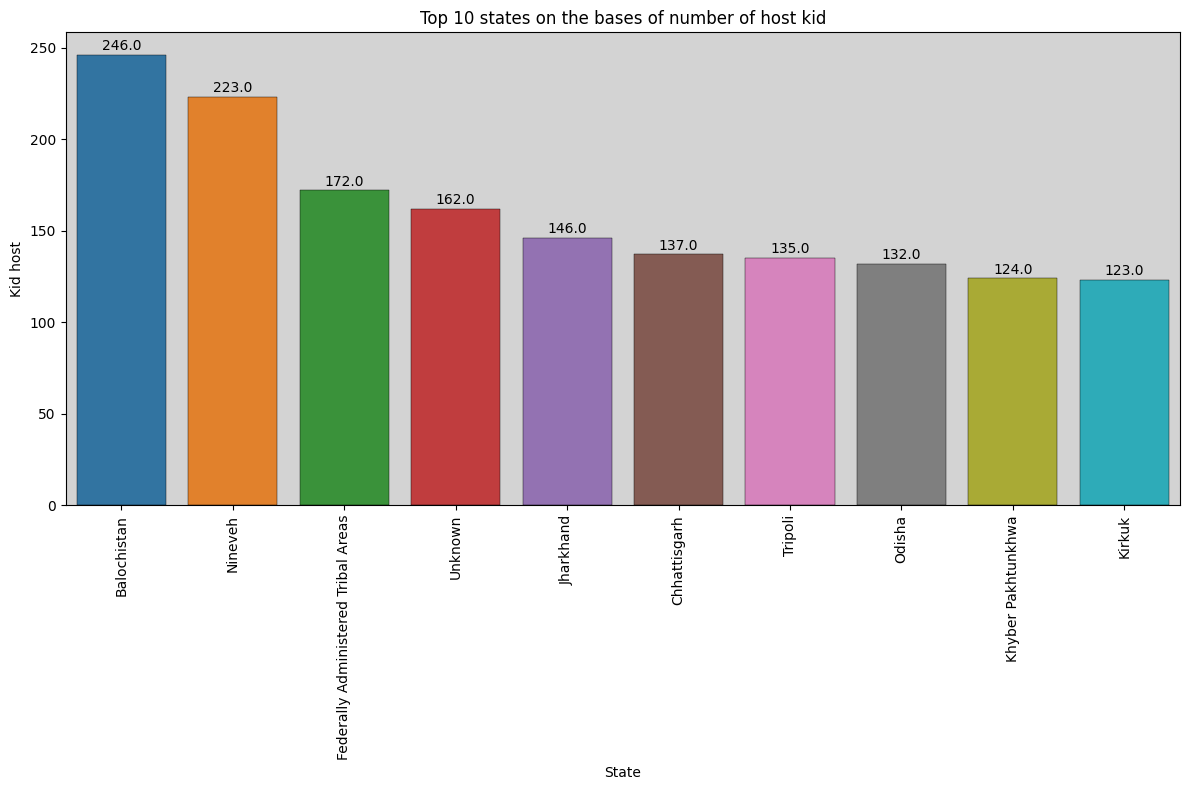

In [ ]:
plt.figure(figsize=(12,8))
ax=sns.barplot(x=host_state["state"],y=host_state["kid_host"],edgecolor="black",linewidth=0.3)
for i,value in enumerate(host_state["kid_host"]):
  plt.text(i,value+2.5,str(value),ha="center")
ax.set_facecolor("lightgray")
ax.set_xlabel("State")
ax.set_ylabel("Kid host")
ax.set_title("Top 10 states on the bases of number of host kid")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From chart:-


1.   Balochistan had the highest number of kid host which was 246.
2.   The difference between the number of host kids in the 10 states(where highest number of host kid among all the states) is minimum.



###Organisations and the deaths

* Following we look at the top 10 organisations on the bases of there activity and deaths

In [ ]:
gang_df=gt_df.groupby("gang_name").agg({"gang_name":"count","terrorist_killed":"sum"}).rename(columns=({"gang_name":"total_attack"})).sort_values(by="total_attack",ascending=False).reset_index()
gang_attack_df=gang_df.head(10)
gang_kill_df=gang_df.sort_values(by="terrorist_killed",ascending=False).reset_index().head(10)

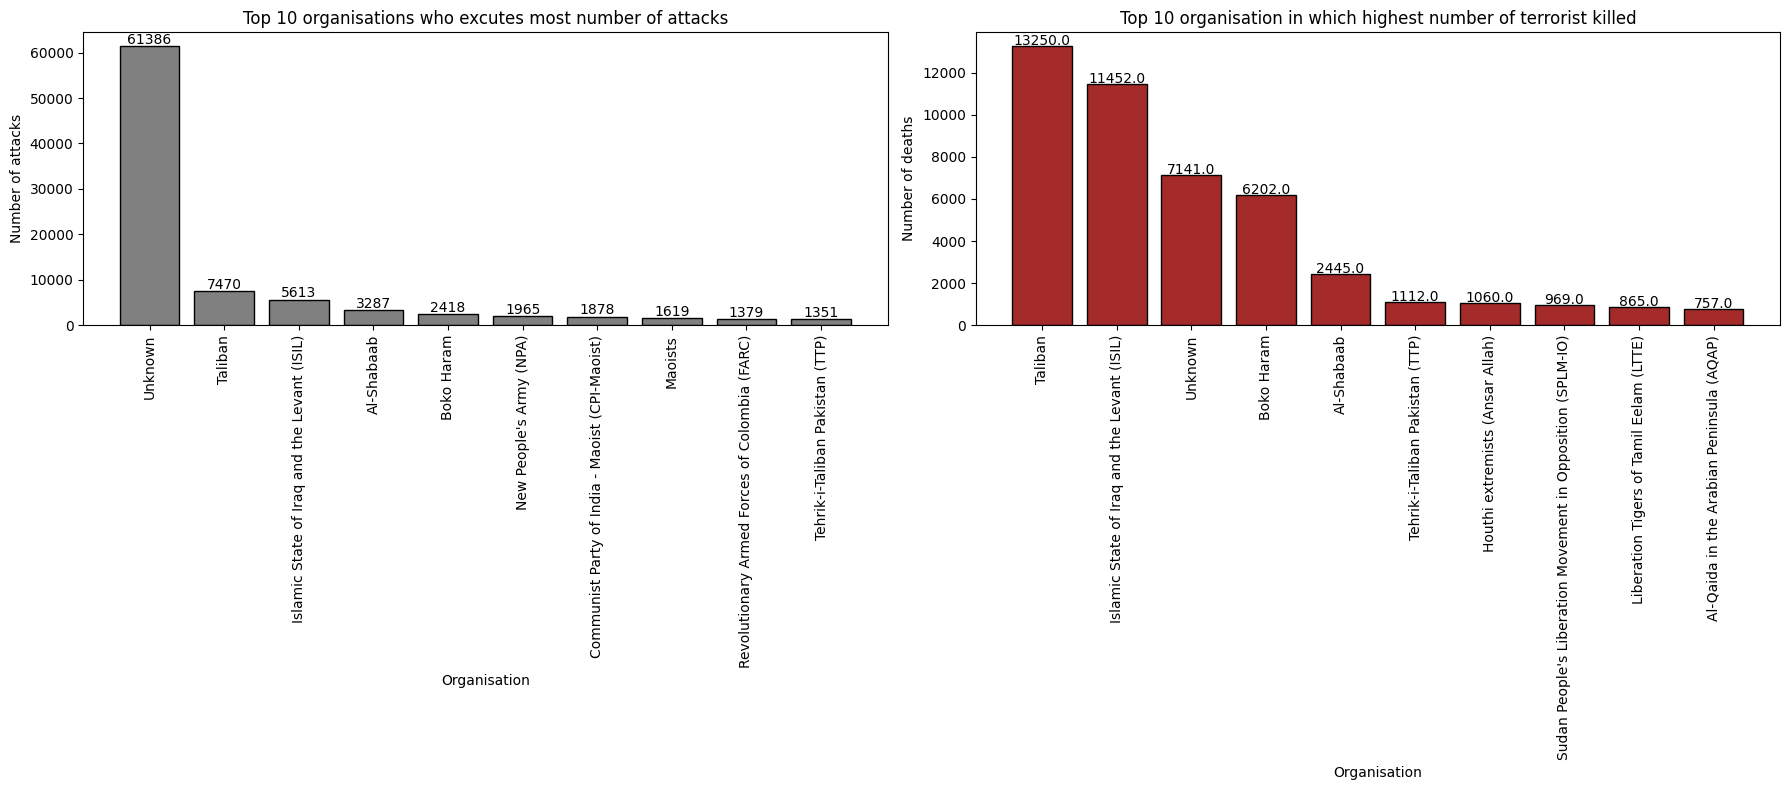

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
ax[0].grid(False)
ax[0].bar(gang_attack_df["gang_name"],gang_attack_df["total_attack"],color="gray",edgecolor="black")
ax[0].set_title("Top 10 organisations who excutes most number of attacks")
ax[0].set_xlabel("Organisation")
ax[0].set_ylabel("Number of attacks")
for i,value in enumerate(gang_attack_df["total_attack"]):
  ax[0].text(i,value+500,str(value),ha="center")
ax[1].bar(gang_kill_df["gang_name"],gang_kill_df["terrorist_killed"],color="brown",edgecolor="black")
ax[1].set_title("Top 10 organisation in which highest number of terrorist killed")
ax[1].set_xlabel("Organisation")
ax[1].set_ylabel("Number of deaths")
ax[1].grid(False)
for i,value in enumerate(gang_kill_df["terrorist_killed"]):
  ax[1].text(i,value+50,str(value),ha="center")

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

From the chart:-


1.   Significant attacks has been done by Unknown organisation and there count is above 60,000 and the activity of other groups is negligible in front of this.And the count of been killed is around 7000 which is 8.5% of tere attacks

1.   Taliban's terrorist killed number is highest among all other and there number is approximately double of there acitivites




###Bar chart of number of attacks on different targets



*   In this we look at the most targeted sectors by the terrorists



In [ ]:
target_df=gt_df.groupby("target").agg({"target":"count"}).rename(columns={"target":"total_attack"}).sort_values(by="total_attack",ascending=False).reset_index().head(10)

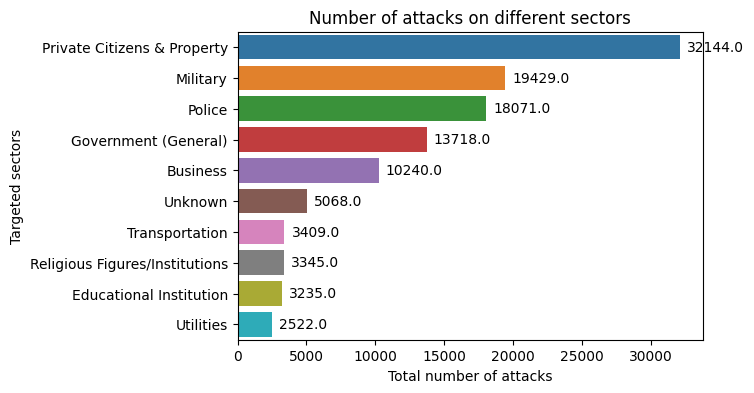

In [ ]:
plt.figure(figsize=(6,4))
ax=sns.barplot(x=target_df["total_attack"],y=target_df["target"],orient="h")
for p in ax.patches:
    width = p.get_width()
    plt.annotate(f'{width}',
                 xy=(width, p.get_y() + p.get_height() / 2),
                 xytext=(5, 0),
                 textcoords='offset points',
                 ha='left', va='center')
plt.xlabel("Total number of attacks")
plt.ylabel("Targeted sectors")
plt.title("Number of attacks on different sectors")
plt.show()



*   From the chart:-


1.   Mostly attackers attacked on Citizens and private properties and 32144 is the number of attacks
2.   Attacks on Military and Ploice were almost equal or there is a slight difference





###terrorist killed and wounded in the countries

* In this we will look at the countries where most number of terrorist killed and wounded.

In [ ]:
terr_kill_df=gt_df.groupby("city").agg({"terrorist_killed":"sum"}).sort_values(by="terrorist_killed",ascending=False).head(10).reset_index()
terr_wound_df=gt_df.groupby("city").agg({"terrorist_wounded":"sum"}).sort_values(by="terrorist_wounded",ascending=False).head(10).reset_index()

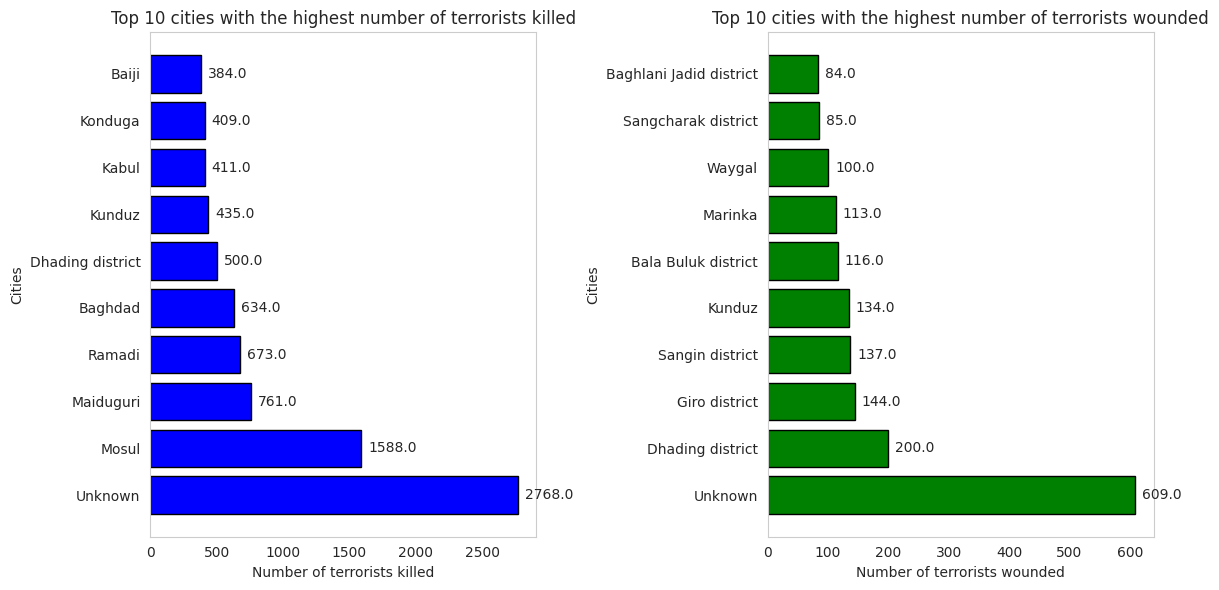

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].grid(False)
bars1=ax[0].barh(terr_kill_df["city"], terr_kill_df["terrorist_killed"], color='blue', edgecolor='black')
for bar in bars1:
    width = bar.get_width()
    ax[0].annotate(f'{width}',
                  xy=(width, bar.get_y() + bar.get_height() / 2),
                  xytext=(5, 0),
                  textcoords='offset points',
                  ha='left', va='center')
ax[0].set_title("Top 10 cities with the highest number of terrorists killed")
ax[0].set_xlabel("Number of terrorists killed")
ax[0].set_ylabel("Cities")
bars2=ax[1].barh(terr_wound_df["city"], terr_wound_df["terrorist_wounded"], color="green", edgecolor="black")
for bar in bars2:
  width=bar.get_width()
  ax[1].annotate(f"{width}",xy=(width,bar.get_y()+bar.get_height()/2),xytext=(5,0),textcoords="offset points",ha="left",va="center")
ax[1].set_title("Top 10 cities with the highest number of terrorists wounded")
ax[1].set_xlabel("Number of terrorists wounded")
ax[1].set_ylabel("Cities")
plt.grid(False)
plt.tight_layout()
plt.show()



*   From the chart:-


1.   The top city in which highest number of terrorist killed and wounded is unknown (may be collective cities).
2.   Most of cities which are present in highest terrorist killed , are not present in the highest terrorist wounded cities





###Bar chart of different weapons used in the attack



*   In this we look at the weapon type used by the terrorist



In [ ]:
#comparison of weapons which were used in the attack on the basies of the count()
weapon_df=gt_df.groupby("weapon_type").agg({"weapon_type":"count"})
weapon_df=weapon_df.rename(columns=({"weapon_type":"number"})).sort_values(by="number",ascending=False).reset_index().head(10)

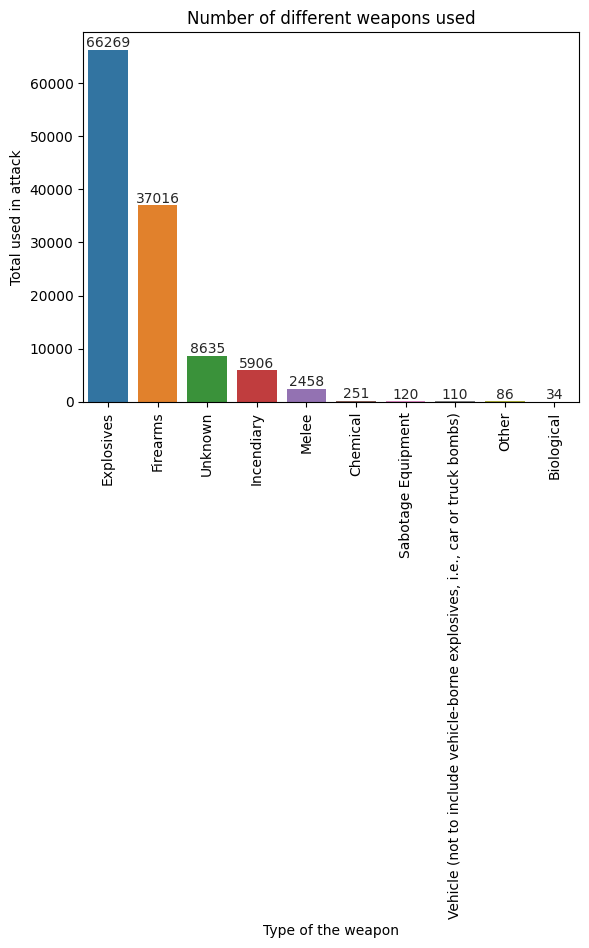

In [ ]:
sns.barplot(x=weapon_df["weapon_type"],y=weapon_df["number"])
sns.set_style("whitegrid")
for i, value in enumerate(weapon_df["number"]):
    plt.text(i, value + 500, str(value), ha="center")
plt.xlabel("Type of the weapon")
plt.ylabel("Total used in attack")
plt.title("Number of different weapons used")
plt.xticks(rotation=90)
plt.show()



*  From the chart:-


1.   Most used weapon type was Explosives(66,269).
2.   There were only 5 types which used more than 2000 times and there was no type which used between 300 to 2,000.

1.   There were only two weapon types (Explosives and Firearms) which were used more than 10,000 times.










###Data source



*   In this section we look at the sources from the terror report laid out.



In [ ]:
db_source=gt_df.groupby("dbsource").agg({"dbsource":"count"}).rename(columns={"dbsource":"total_report"}).sort_values(by="total_report",ascending=False).head().reset_index()

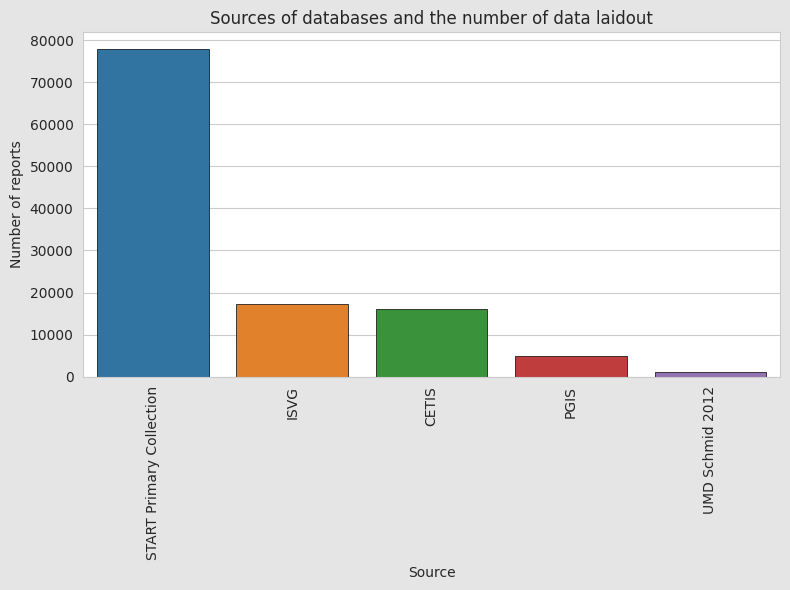

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=db_source["dbsource"],y=db_source["total_report"],edgecolor='black', linewidth=0.5)
plt.title("Sources of databases and the number of data laidout")
plt.xlabel("Source")
plt.ylabel("Number of reports")
plt.xticks(rotation=90)
plt.tight_layout()
fig = plt.gcf()
fig.patch.set_facecolor('#E5E5E5')
fig.show()



*   From chart:-


1.   Start Primary Collection had the biggest number of data report and other sources are negligible in front of it,it reported nearly 80,000 cases , while , it compititor number was around 20,000




###longitude and latitude



*   Here the plot of latitude and longitude


In [ ]:
location=gt_df[["latitude","longitude"]]
location=location.dropna()

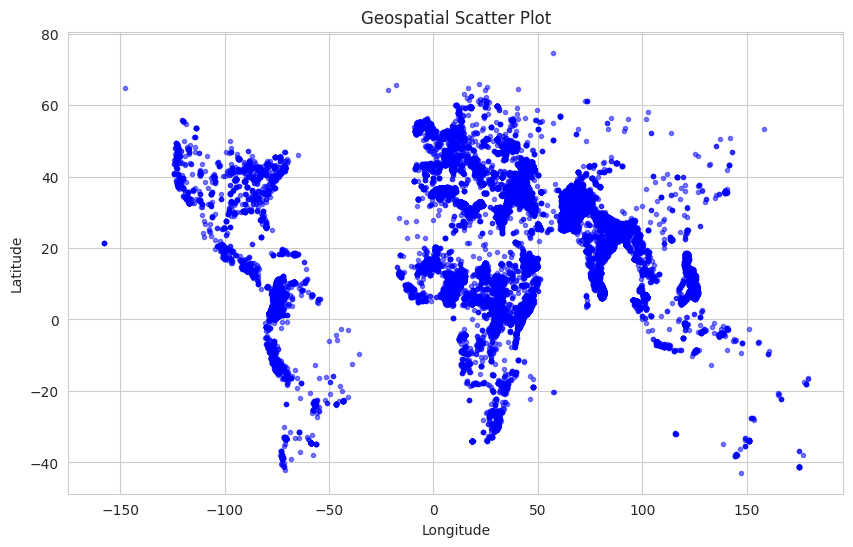

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y=location["latitude"],x=location["longitude"],alpha=0.5,marker=".",c="blue")
plt.title("Geospatial Scatter Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

###Heat map



*   Here the correlation :-



In [ ]:
corr_df=gt_df[["suicide","accepted_attack","total_killed","terrorist_killed","total_wounded","terrorist_wounded","property_damage","ishostkid"]]

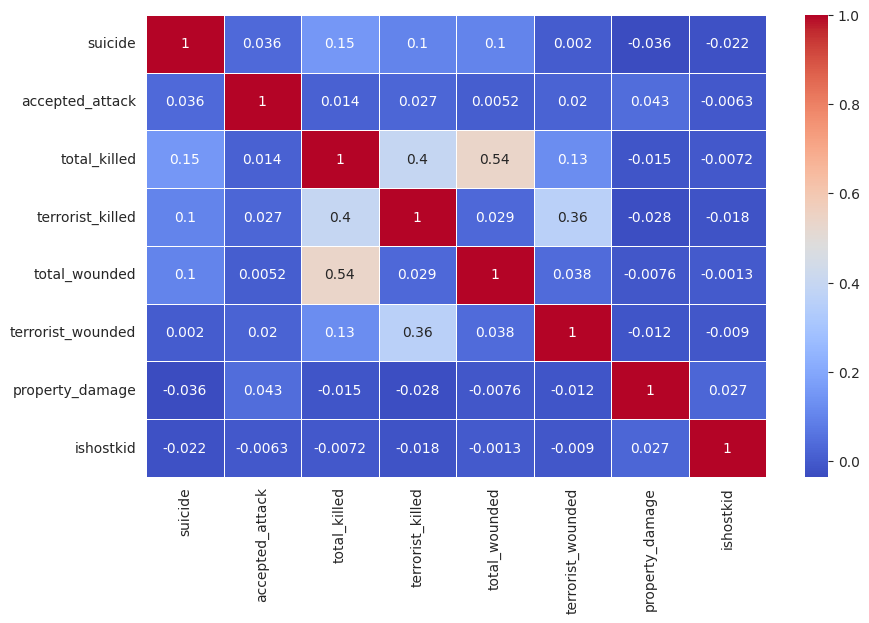

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_df.corr(),annot=True,cmap="coolwarm",linewidths=0.5)
plt.show()

## Key points from EDA



1.   Highest number of attacks was in 2014 whereas the least in the 1973.
2.   The increment in the attacks can be seen after 1998 but the significant rise was after 2010.
1.   Most of the attack happend in Iraq and where the count of people killed and wounded was maximum among all country.
1.   Chad was the country where highest number of people affected in each attack.There average of people affected was around 34 per attack.
1.   Middle East & North Africa was the high-ranking region with the nearly 42% of total attackes.Moreover,the damage of property in this region was foremost.
2.   Balochistan,the country which had the highest number of kid host, which was 246.
2.   The organisation which execute the most of attacks was unknown.While Taliban's was leading in terms of terrorist killed in the attack.
2.   The Private Citizens and Property sector which was promentily attacked.
1.   The city which attacked and in which highest number of terrorist killed was unknown.
2.   Explosives were used significantly among all the weapons.

1.   Star Primary Collection was the leading in laid out the data of terrorist attacks.



